In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame({"A":[1,2,3], "B":[10,20,30]})
df

A   B
0  1  10
1  2  20
2  3  30

In [3]:
def topla_10(x):
    return x + 10

In [4]:
df.apply(topla_10)  # eş zamanlı olarak toplu serilerle çalışır.

A   B
0  11  20
1  12  30
2  13  40

In [5]:
df.transform(topla_10)

A   B
0  11  20
1  12  30
2  13  40

In [7]:
df.transform("sqrt")  # yani burada bu şekildeki string ile ifade edilen fonksiyonlarda apply çalışmaz.

A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226

In [8]:
df.transform([np.sqrt, np.exp])  # liste halinde verdiğimiz fonksiyonları apply da çalıştırır.

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [9]:
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [12]:
df.transform({"A": np.sqrt, "B": np.exp})

A             B
0  1.000000  2.202647e+04
1  1.414214  4.851652e+08
2  1.732051  1.068647e+13

In [14]:
def cikarma(x):  # buradaki x dataframe i temsil ediyor
    return x["B"] - x["A"]  # b sütunundaki değerden a sütunundaki değeri çıkarır

In [16]:
df.apply(cikarma, axis = 1)

0     9
1    18
2    27
dtype: int64

In [17]:
df.transform(cikarma, axis =1)  # hatalı sonuç verir çünkü transform tekli seriler ile çalışır.

ValueError: Function did not transform

In [18]:
df1 = pd.DataFrame({'A':[1, 2, np.nan],
                  'B':[5, np.nan, np.nan],
                  'C':[1, 2, 3]})

In [19]:
df1

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3

In [20]:
df1.dropna(thresh = 2)  # satır dropna

A    B  C
0  1.0  5.0  1
1  2.0  NaN  2

In [21]:
df1.dropna(thresh = 2, axis = 1)  # kolon dropna

A  C
0  1.0  1
1  2.0  2
2  NaN  3

In [23]:
df1["A"].fillna(value = df1["A"].mean())  # bizim belirlediğimiz değerle boş olan yani NaN olan satırlarını doldurur

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [24]:
V1 = np.array([2,3,5,np.NaN,7,1,np.NaN,10,14])
V2 = np.array([8,np.NaN,5,8,11,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,13,5,6,13,7,np.NaN,3,30])

In [25]:
df2 = pd.DataFrame(
        {"Var1" : V1,
         "Var2" : V2,
         "Var3" : V3}
)

In [26]:
df2

Var1  Var2  Var3
0   2.0   8.0   NaN
1   3.0   NaN  13.0
2   5.0   5.0   5.0
3   NaN   8.0   6.0
4   7.0  11.0  13.0
5   1.0   NaN   7.0
6   NaN   NaN   NaN
7  10.0   2.0   3.0
8  14.0   3.0  30.0

In [27]:
df2["Var1"].fillna(0)  # var1 sütununda NaN olan değerleri sıfır ile doldur

0     2.0
1     3.0
2     5.0
3     0.0
4     7.0
5     1.0
6     0.0
7    10.0
8    14.0
Name: Var1, dtype: float64

In [28]:
df2["Var2"].fillna(df2["Var2"].mean())  # var1 sütununda NaN olan değerleri var 2 nin ortalaması ile doldur.

0     8.000000
1     6.166667
2     5.000000
3     8.000000
4    11.000000
5     6.166667
6     6.166667
7     2.000000
8     3.000000
Name: Var2, dtype: float64

In [29]:
df2.apply(lambda x: x.fillna(x.mean()), axis=0) # apply kullanarak dataframe e ait tüm sütunları yine aynı sahip oldukları sütunların ortalaması ile dodururuz

Var1       Var2  Var3
0   2.0   8.000000  11.0
1   3.0   6.166667  13.0
2   5.0   5.000000   5.0
3   6.0   8.000000   6.0
4   7.0  11.000000  13.0
5   1.0   6.166667   7.0
6   6.0   6.166667  11.0
7  10.0   2.000000   3.0
8  14.0   3.000000  30.0

In [32]:
df2["Var3"].fillna(df2["Var3"].median())  # yine var3 teki NaN ları var3 median ile doldurma

0     7.0
1    13.0
2     5.0
3     6.0
4    13.0
5     7.0
6     7.0
7     3.0
8    30.0
Name: Var3, dtype: float64

In [33]:
Var1 = np.array([1,3,6,np.NaN,7,1,9,np.NaN,15])
Var2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
Var3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
Var4 = np.array(["IT","IT","IT","HR","HR","HR","HR","IT","IT"])
df3 = pd.DataFrame(
        {"salary" : Var1,
         "Var2" : Var2,
         "Var3" : Var3,
         "department" : Var4}
)

In [34]:
df3

salary  Var2  Var3 department
0     1.0   7.0   NaN         IT
1     3.0   NaN  12.0         IT
2     6.0   5.0   5.0         IT
3     NaN   8.0   6.0         HR
4     7.0  12.0  14.0         HR
5     1.0   NaN   7.0         HR
6     9.0   NaN   NaN         HR
7     NaN   2.0   2.0         IT
8    15.0   3.0  31.0         IT

In [35]:
df3.groupby("department")["salary"].mean()  # departmanlara göre ortalama maaşı getirin

department
HR    5.666667
IT    6.250000
Name: salary, dtype: float64

In [38]:
df3.salary.mean()

6.0

In [36]:
df3["salary"].fillna(df3.groupby("department")["salary"].transform("mean"))  # apply str olarak değil np.mean olarak yazılırsa o da kullanılır

0     1.000000
1     3.000000
2     6.000000
3     5.666667
4     7.000000
5     1.000000
6     9.000000
7     6.250000
8    15.000000
Name: salary, dtype: float64

In [37]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V4 = np.array(["IT",np.nan,"HR","HR","HR","HR",np.nan,"IT","HR"], dtype=object)
df4 = pd.DataFrame(
        {"salary" : V1,
        "department" : V4}
)
df4

salary department
0     1.0         IT
1     3.0        NaN
2     6.0         HR
3     NaN         HR
4     7.0         HR
5     1.0         HR
6     NaN        NaN
7     9.0         IT
8    15.0         HR

In [39]:
df4["department"].fillna(method = "ffill")

0    IT
1    IT
2    HR
3    HR
4    HR
5    HR
6    HR
7    IT
8    HR
Name: department, dtype: object

In [40]:
df4["department"].fillna(method = "bfill")

0    IT
1    HR
2    HR
3    HR
4    HR
5    HR
6    IT
7    IT
8    HR
Name: department, dtype: object

In [41]:
df5 = sns.load_dataset("diamonds") # mücevherlere ait kesim karat parlaklık falan gibi değerler var.
df5.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [42]:
df5.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

<AxesSubplot:xlabel='table'>

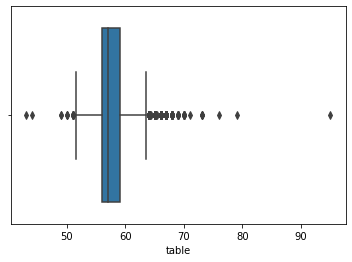

In [43]:
sns.boxplot(x = df5.table)

In [44]:
df5["table"].quantile(0.25)

56.0

In [46]:
Q1 = df5["table"].quantile(0.25)
Q3 = df5["table"].quantile(0.75)
IQR = Q3 - Q1
IQR

3.0

In [52]:
# np.percentile(df5["table"], 1)

In [47]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [53]:
outlier_low = df5[df5["table"] < lower_lim]  # küçük olan outlier ları temsil ediyor

In [54]:
outlier_high = df5[df5["table"] > upper_lim]  # upper limit ten büyük olan yani boxplot taki sağdaki değerleri verir

In [63]:
df5[((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # table sütunu için toplam outlier ları getirelim.

carat        cut color clarity  depth  table  price     x     y     z
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
91      0.86       Fair     E     SI2   55.1   69.0   2757  6.45  6.33  3.52
145     0.70       Good     H    VVS2   62.1   64.0   2767  5.62  5.65  3.50
219     0.53  Very Good     D    VVS2   57.5   64.0   2782  5.34  5.37  3.08
227     0.84       Fair     G     SI1   55.1   67.0   2782  6.39  6.20  3.47
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53695   0.75       Good     E     VS2   59.7   65.0   2717  5.85  5.80  3.48
53697   0.70       Fair     H    VVS2   64.5   65.0   2717  5.52  5.45  3.54
53756   0.84       Fair     G     VS1   55.6   64.0   2724  6.42  6.32  3.54
53757   0.72       Fair     F     VS2   55.4   64.0   2724  6.06  5.97  3.34
53785   0.89       Good     E     SI2   64.3   65.0   2728  6.00  5.95  3.84

[605 rows x 10 columns]

In [64]:
df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # table sütunu için outlier olmayan değerleri getir..

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53335 rows x 10 columns]

In [65]:
df5_cleaned = df5[~((df5["table"] < lower_lim) | (df5["table"] > upper_lim))]  # outlier olmayan değerlerini değişkene atadık

<AxesSubplot:xlabel='table'>

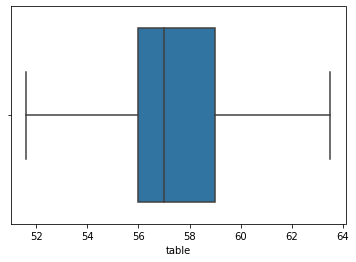

In [66]:
sns.boxplot(x = df5_cleaned.table)  # bu değişkenin boxplot ını çizdik

<AxesSubplot:xlabel='carat'>

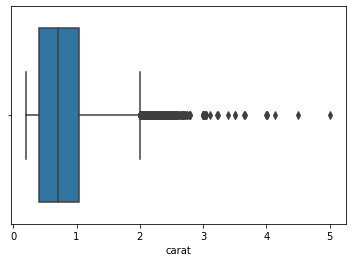

In [67]:
sns.boxplot(x = df5["carat"])  # sadece karat sütunu için bxplot table çizip outlier lara bakalım.

<AxesSubplot:xlabel='carat'>

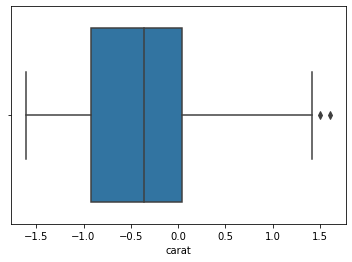

In [68]:
sns.boxplot(x = np.log(df5["carat"]))  # sağa sola kuyruklu olan yapılar için logaritma yöntemi kullanılabilir genellikle

## “winsorize” nedir?
### Verisetindeki uç değerlerin atılması yerine verisetindeki en yakın değerleri koyarak ortalamaya yaklaştırılmasını sağlayan istatistiki düzeltme tekniği

Winsorizing or winsorization is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers. It is named after the engineer-turned-biostatistician Charles P. Winsor (1895–1951)

In [69]:
from scipy.stats.mstats import winsorize

In [70]:
df_table_win = winsorize(df5["table"], (0.01, 0.02))  # df5["table"] kullanacağımız sütun, (0.01 ve 0.02) ise aralıklardır. 

<AxesSubplot:>

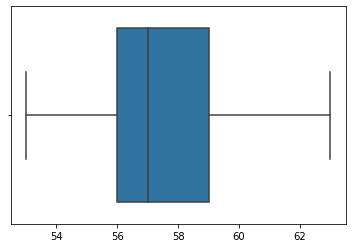

In [71]:
sns.boxplot(x = df_table_win)